# Introduction to Deep Learning

HSE University - Coursera

## Week 4: Autoencoders

### Supervised vs Unsupervised

**Supervised Learning**
- Take (x,y) pairs
- Learn mapping $x \rightarrow y$

**Unsupervised Learning**
- Take x alone
- Learn hidden sturcture in x
- Behind the data

**Why Unsupervised Learning?**
- Find the most relevant features
- Compress information
- Retrieve similar objects
- Generate new data samples
- Explore high dimensional data

## Autoencoders

**Main Idea:**
They enconde the original data into a hidden representation and decode it back to its original space. The main idea is to take data in some original (high-dimensional) space; Project the data into a new subspace **from which it can then be accurately restored**.

- Encoder = data to be hidden $\rightarrow x$
- Decoder = hidden data
- Decoder( Encoder(x)) $\approx x$

<img src="./img/autoencoder_net.png" />

**Applications**
- Compress data
    - $| code | << |data|$
- Dimensionality reduction
    - Before feeding data to your XGBoost, for example

- etc

### Linear Case

Example: matrix factorization, where the goal is to minimize the reconstruction error

$$ X = U \times V^T $$

We want to find
$$min_{U,V} ~~~~ \| X - U . V^T \| $$

We can formalize this problem under an autoencoder perespective:

<img src="./img/matrix_factorization.png" />

Instead of having a linear decomposition, we can try to add some non-linearity to the process. We can do this by adding more hidden layers, in other words, by adding Dense layers.

<img src="./img/deep_matrix_factorization.png" />

### Image Data: image2image convolution

This is an example of a one layer convolutioni layer. Anything that maps your original data representation into a hidden representationm and anything that maps it backwards to the original representation, is an autoencoder.

<img src="./img/image2image.png" />



In [6]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

DATA_PATH = "../../Datasets/Puppy_vs_bagel/"

BATCH_SIZE = 2


TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(128),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.ToTensor(),
    ])

#train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
train_dataset = datasets.ImageFolder(root=DATA_PATH, transform=TRANSFORM_IMG)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)




Dataset ImageFolder
    Number of datapoints: 16
    Root location: ../../Datasets/Puppy_vs_bagel/
    StandardTransform
Transform: Compose(
               Resize(size=128, interpolation=bilinear, max_size=None, antialias=None)
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
               ToTensor()
           )

In [1]:



INPUT_CHANNEL = 3
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # encoder
        self.encoder = nn.Sequential(

            nn.Conv2d( INPUT_CHANNEL, 16, kernel_size=5, padding=2, stride=1),
            nn.ReLU(True),
            nn.MaxPool2d(3, stride=1, padding=2),
            nn.Linear(in_features=256, out_features=256), # this is a dense layer
            nn.ReLU(True)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28 * 28),
            nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

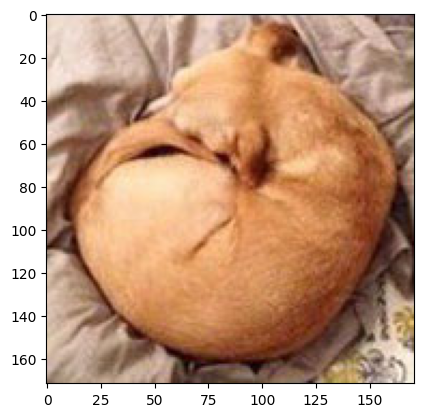

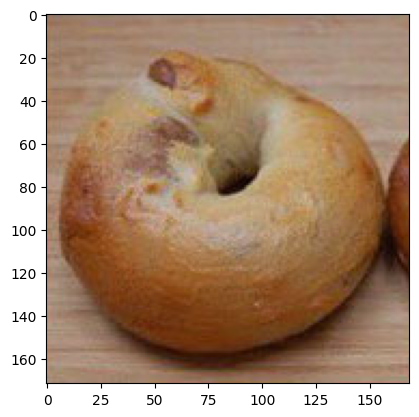

In [45]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt


DATASET_PATH = "../../Datasets/Puppy_vs_bagel/"

# read the first image from DATASET_PATH_DOGS
bagel = Image.open(DATASET_PATH + os.listdir(DATASET_PATH)[0]).convert('RGB')
dog =   Image.open(DATASET_PATH + os.listdir(DATASET_PATH)[8]).convert('RGB')
plt.imshow(dog)
plt.show()
plt.imshow(bagel)
plt.show()

In [62]:
torch.from_numpy(bagel_copy).shape

torch.Size([1, 172, 169, 3])

In [68]:
# load image
bagel = Image.open(DATASET_PATH + os.listdir(DATASET_PATH)[0]).convert('RGB')

bagel = bagel.resize((128,128))

# create a copy
bagel_copy = bagel.copy()

# add an extra dimension to the image
bagel_copy = np.expand_dims(bagel_copy, axis=0)

bagel_tensor =torch.transpose(torch.from_numpy(bagel_copy).float(), 3, 1)
print(f"Image shape {bagel_copy.shape}")
# define a convolutional layer for the image
conv_layer = nn.Conv2d( INPUT_CHANNEL, 16, kernel_size=5, padding=2, stride=1)

# convert conv_layer to a numpy array
#conv_layer_np = conv_layer.weight.data.numpy()
#print(f"Image after convolution {conv_layer_np.shape}")

# apply convolution to the image
output = conv_layer(bagel_tensor)
output





Image shape (1, 128, 128, 3)


tensor([[[[ -43.3723,  -61.7239,  -32.2481,  ...,  -42.5380,  -44.5368,
            -30.9862],
          [ -25.6691,  -29.3449,   -3.9525,  ...,   -8.6971,  -22.2166,
            -17.6728],
          [ -29.4084,  -30.8468,    3.7542,  ...,    2.5578,  -19.6750,
              9.0252],
          ...,
          [ -36.9106,  -37.5761,    1.1673,  ...,   -2.4457,  -20.8486,
             13.1463],
          [ -91.3138, -112.3267,  -84.7290,  ...,  -94.0659,  -81.8830,
            -37.2312],
          [ -42.0875,  -33.5678,    6.4965,  ...,    3.9695,   16.2195,
             38.1325]],

         [[ -29.7046,  -63.4914, -102.4729,  ..., -122.6142, -104.1788,
           -114.3645],
          [ -68.4772, -100.4079, -133.2478,  ..., -155.8045, -145.9449,
           -114.9565],
          [ -84.7613,  -98.2995, -115.4187,  ..., -128.7301,  -92.4046,
            -83.3405],
          ...,
          [ -97.5486, -112.6883, -129.6816,  ..., -137.1708,  -98.4929,
            -85.4491],
          [-110.95

### Autoencoder Applications



In [67]:
torch.transpose(torch.from_numpy(bagel_copy).float(), 3, 1).shape

torch.Size([1, 3, 128, 128])

In [89]:
encoder = nn.Sequential(
            nn.Conv2d( INPUT_CHANNEL, 16, kernel_size=5, padding=2, stride=1),
            nn.ReLU(True),
            nn.MaxPool2d(5, stride=1, padding=0),
            nn.MaxPool2d(5, stride=1, padding=0),
            nn.MaxPool2d(5, stride=1, padding=0),
            # nn.Flatten(),
            nn.Linear(in_features=116, out_features=256), # this is a dense layer
            nn.ReLU(True)
        )

In [90]:
encoder(bagel_tensor)

tensor([[[[9.3610e+00, 0.0000e+00, 0.0000e+00,  ..., 4.2568e+01,
           0.0000e+00, 7.7314e+00],
          [9.3966e+00, 0.0000e+00, 0.0000e+00,  ..., 4.2483e+01,
           0.0000e+00, 7.7362e+00],
          [9.3966e+00, 0.0000e+00, 0.0000e+00,  ..., 4.2483e+01,
           0.0000e+00, 7.7362e+00],
          ...,
          [7.8009e+00, 7.0005e+00, 0.0000e+00,  ..., 5.9897e+01,
           6.2990e+00, 7.0053e+00],
          [7.8097e+00, 6.8020e+00, 0.0000e+00,  ..., 6.0464e+01,
           6.6504e+00, 7.3218e+00],
          [8.0068e+00, 6.6953e+00, 0.0000e+00,  ..., 6.1878e+01,
           7.5123e+00, 8.1236e+00]],

         [[7.9038e-01, 0.0000e+00, 1.1811e+01,  ..., 7.8771e+00,
           0.0000e+00, 0.0000e+00],
          [9.7136e-01, 0.0000e+00, 1.1327e+01,  ..., 7.9320e+00,
           0.0000e+00, 0.0000e+00],
          [7.7158e-01, 0.0000e+00, 1.1476e+01,  ..., 7.9725e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 4.0548e+00, 0.0000e+00,  ..., 1.2404

In [ ]:
nn.ConvTranspose2d()

import torch.nn.functional as F

F.interpolate()

### A Wrong Autoencoder Architecture

We can extend this architecture until it gets larger. So large that its hidden layer dimension is higher than the original image dimensions. From a mathematical perspective, this is a totally legitimate model. But there is something wrong here. Basically, if your network is able to maintain a representation which is larger than the initial one, then the Autoencoder will learn in such a way that does not produce good features.

<img src="./img/wrong_autoencoder.png" />


### Sparse Autoencoders

The Naive approach will learn the identity function!

**Idea 1:** L1 on **activations**, sparse code.

$$ L = \| X - Dec(Enc(X)) \| + \sum_i | Enc_i(X) | $$

What happens when you regularize neural network weights with $L_1$ regularization? $L_1$ regularization means additing sum of the absolute values of weights to the loss function. The answer is that some weights may end up beingn exactly zero. If the regularization is harsh enough, some of the irrelevant features will be dropped from your model. 

<img src="img/l1_reg.png" />



### Redundant Autoencoder

**Idea 2:** noise/dropout, redundant code

$$ L = \| X - Enc(Dec(Noise(X))) \| $$

This way, you just drop the features, so that your decoder cannot access all the features from the encoder. This results in the features of your encoder being redundant.

<img src="./img/denoise.png" />

**Idea 3:** Distort input, learn to fix distortion.



### Pretraining: Supervised vs Unsupervised

Supervised pre-training (on similar task)
- Needs labels for similar problem
- Luckily, we have ImageNet and model Zoo
    - It is only good for popular problems

Unsupervised pretraining (autoencoder)
- Needs no labels
- May learn features that are irrelevant for your problem
- e.g. background sky color for object classification



## Autoencoder Applications: Image Generation, Data Visualization and more

1. Exploratory data analysis

If you try to apply t-SNE to a 100x100 pixel image, this may take forever to converge. Instead, you can use the autoencoder that will take the pixels and convert it into a hidden representation where there is only a 100 or maybe 250 pixels, which can then be embedded in t-SNE (t-Stochastic Neighborhood Embedding).

<img src="./img/dim_reduction.png" />

2. Image Morphing with AE

```
Idea:
If Enc(image1) = c1
   Enc(image2) = c2
Then
    maybe (c1+c2)/2 is a semantic average of the two images
```

